In [1]:
from gradflow import Tensor
from gradflow.model import Model
import gradflow.functions as F
from gradflow.optim import *

from datasets.mnist import MNISTDataset

import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Net(Model):
  def __init__(self):
    super().__init__()

    self.dense0 = F.Linear(28*28, 16)
    self.relu = F.ReLU()
    self.dense1 =  F.Linear(16, 10)
    self.logsoftmax = F.LogSoftmax(dim=-1)
  
  def forward(self, x) -> Tensor:
    out = self.dense0(x)
    out = self.relu(out)
    out = self.dense1(out)
    return self.logsoftmax(out)

In [3]:
train_dset = MNISTDataset("../data/", batch_size=32*3, shuffle=True)
test_dset = MNISTDataset("../data/", batch_size=10, train=False)

train-images-idx3-ubyte.gz already exists in ../data. Skipping...
t10k-images-idx3-ubyte.gz already exists in ../data. Skipping...
train-labels-idx1-ubyte.gz already exists in ../data. Skipping...
t10k-labels-idx1-ubyte.gz already exists in ../data. Skipping...
train-images-idx3-ubyte.gz already exists in ../data. Skipping...
t10k-images-idx3-ubyte.gz already exists in ../data. Skipping...
train-labels-idx1-ubyte.gz already exists in ../data. Skipping...
t10k-labels-idx1-ubyte.gz already exists in ../data. Skipping...


In [4]:
def dset_loss_acc(dset, model, criterion):
  loss = 0
  corrects = 0
  for imgs, labels in dset:
    outputs = model(imgs)
    loss += criterion(outputs, labels).data

    preds = outputs.data.argmax(axis=1)
    labels = labels.data.argmax(axis=1)
    corrects += ((preds == labels).sum() / labels.size)

  return loss / len(dset), corrects / len(dset)
    

In [5]:
model = Net()
criterion = F.NLLLoss(indexed=False)
optimizer = Adam(model.parameters(), 0.01, 0)

In [6]:


training_loss = []
corrects = []
for epoch in range(1):
  for i, (imgs, labels) in enumerate(train_dset):
    optimizer.zero_grad()

    outputs = model(imgs)
    loss = criterion(outputs, labels)

    training_loss += [loss.data]
    preds = outputs.data.argmax(axis=1)
    labels = labels.data.argmax(axis=1)
    corrects += [(preds == labels).sum() / labels.size]

    loss.backward()

    optimizer.step()

    if ((i + 1) % 100 == 0):
      test_loss, test_acc = dset_loss_acc(test_dset, model, criterion)
      print("=============================")
      print("Last 100 train | avg. loss: %.4f, acc: %.4f" \
            % (np.mean(training_loss[-100:]), np.mean(corrects[-100:])))
      print("Test           | avg. loss: %.4f, acc: %.4f" % (test_loss, test_acc))
      print("=============================")

Last 100 train | avg. loss: 1.9655, acc: 0.3981
Test           | avg. loss: 1.0812, acc: 0.6504
Last 100 train | avg. loss: 0.7840, acc: 0.7535
Test           | avg. loss: 0.5602, acc: 0.8228
Last 100 train | avg. loss: 0.5283, acc: 0.8342
Test           | avg. loss: 0.4236, acc: 0.8715
Last 100 train | avg. loss: 0.4072, acc: 0.8771
Test           | avg. loss: 0.3536, acc: 0.9000
Last 100 train | avg. loss: 0.3579, acc: 0.8961
Test           | avg. loss: 0.3206, acc: 0.9014
Last 100 train | avg. loss: 0.3265, acc: 0.9055
Test           | avg. loss: 0.2891, acc: 0.9132


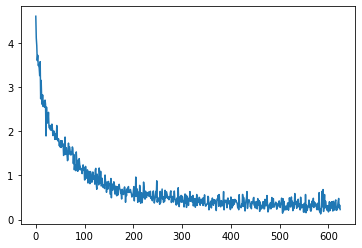

In [7]:
plt.plot(training_loss)

In [8]:
batch = 3

true_imgs, true_labels = test_dset[batch]
labels = true_labels.data.argmax(axis=1)
preds = model(true_imgs)
preds_labels = preds.data.argmax(axis=1)

In [9]:
true_labels.data

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
labels

array([3, 1, 3, 4, 7, 2, 7, 1, 2, 1])

In [11]:
preds.data

array([[-9.75256920e+00, -1.04028683e+01, -1.40265808e+01,
        -6.43919110e-02, -1.64632950e+01, -3.00430846e+00,
        -1.96865120e+01, -4.50134039e+00, -1.00950680e+01,
        -6.46003580e+00],
       [-9.43090057e+00, -6.57854080e-02, -5.74374723e+00,
        -4.36960268e+00, -5.59252024e+00, -3.52314615e+00,
        -6.95371771e+00, -6.65438700e+00, -4.48381758e+00,
        -6.94518328e+00],
       [-1.39999275e+01, -1.19044952e+01, -1.17355385e+01,
        -1.28350616e-01, -1.50074120e+01, -2.12409401e+00,
        -2.02080994e+01, -1.55066891e+01, -7.09456491e+00,
        -9.59571934e+00],
       [-4.15559769e-01, -9.48150826e+00, -3.15198135e+00,
        -1.12566872e+01, -4.94105148e+00, -2.67173672e+00,
        -1.57502460e+00, -9.50388718e+00, -4.28462029e+00,
        -1.01786842e+01],
       [-1.52541695e+01, -1.70580940e+01, -7.83509350e+00,
        -6.29241562e+00, -1.24953709e+01, -1.28111877e+01,
        -2.42734127e+01, -2.99060345e-03, -9.80844593e+00,
        -7.

In [12]:
preds_labels

array([3, 1, 3, 0, 7, 2, 7, 1, 2, 1])

In [13]:
labels

array([3, 1, 3, 4, 7, 2, 7, 1, 2, 1])

In [14]:
(preds_labels == labels).astype(np.uint8)

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=uint8)